# Causal Discovery Experiments of PC vs PC-with-sorting

In the PCMCI paper, Runge et al. proposes the improvement of a PC-based algorithm for time-series, which improves the skeleton discovery stage to estimate a good superset of parents. This superset of parents is then used in a second stage of the algorithm, known as the Momentary Conditional Independence (MCI) condition.

In [1]:
%load_ext lab_black

In [2]:
%load_ext autoreload
%autoreload 2

In [38]:
import os
from pathlib import Path
from pprint import pprint

import numpy as np
import bnlearn as bn
import networkx as nx

import causal_networkx
from causal_networkx.ci import g_square_discrete, fisherz, g_square_binary
from causal_networkx.discovery import PC

# Load sample graphs using bnlearn

bnlearn is a package providing sample graphs. It was originally written in R and the Python interface now provides much of the same functionality.

## Discrete data
We'll start out first analyzing discrete data with relatively simple structure.

1. For the Asia graph: https://www.bnlearn.com/documentation/man/asia.html
Here, we're interested in determining the causes of "shortness-of-breath" (i.e. dyspnoea). Bnlearn provides the ground-truth DAG and also a dataset.

In [6]:
# Load data
df = bn.import_example(data="asia")

[bnlearn] >Downloading example [asia] dataset..
100% [.........................................................................] 5373 / 5373[bnlearn] >Extracting files..


  0%|          | 0/8 [00:00<?, ?it/s]

[bnlearn] >Import <asia>
[bnlearn] >Loading bif file </Users/adam2392/miniconda3/envs/causalx64/lib/python3.8/site-packages/bnlearn/data/asia.bif>
[bnlearn] >Checking CPDs..
[bnlearn] >Check for DAG structure. Correct: True
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


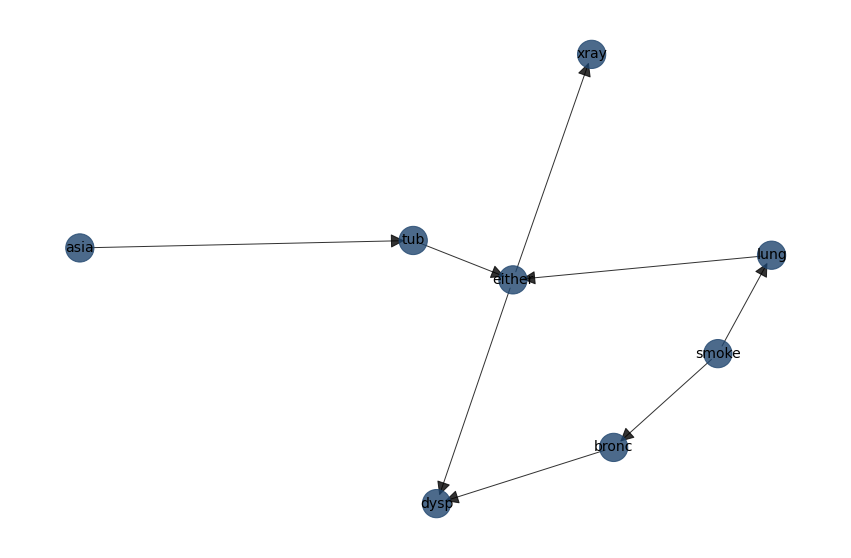

Plotting the ground-truth DAG


In [26]:
# load the graph
DAG = bn.import_DAG("asia")

# plot ground truth
G = bn.plot(DAG)
print("Plotting the ground-truth DAG")

In [11]:
display(df.head())
print(df.shape)

,asia,tub,smoke,lung,bronc,either,xray,dysp
0,1,1,1,1,0,1,1,0
1,1,1,1,1,1,1,1,1
2,1,1,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1
4,1,1,0,1,0,1,1,0


(10000, 8)


## Analyze the dataset using PC

In [37]:
for col in df.columns:
    print(df[col].unique())

[1 0]
[1 0]
[1 0]
[1 0]
[0 1]
[1 0]
[1 0]
[0 1]


In [39]:
ci_estimator = g_square_binary
# ci_estimator = fisherz
alpha = 0.05

pcalg = PC(
    ci_estimator=ci_estimator,
    alpha=alpha,
    apply_orientations=False,
)

In [40]:
pcalg.fit(df)

Graph with 8 nodes and 7 edges
['asia', 'tub', 'smoke', 'lung', 'bronc', 'either', 'xray', 'dysp']


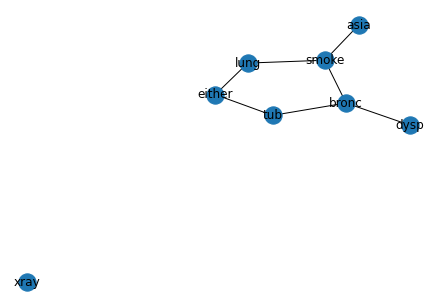

In [41]:
graph = pcalg.graph_
sep_set = pcalg.separating_sets_

print(graph)
print(graph.nodes)
nx.draw(graph, with_labels=True)

In [42]:
pprint(sep_set)

defaultdict(<function ConstraintDiscovery._initialize_graph.<locals>.<lambda> at 0x7fc902fca280>,
            {'asia': defaultdict(<class 'set'>,
                                 {'bronc': set(),
                                  'dysp': set(),
                                  'either': set(),
                                  'lung': set(),
                                  'tub': {'either', 'bronc'},
                                  'xray': set()}),
             'bronc': defaultdict(<class 'set'>,
                                  {'asia': set(),
                                   'either': {'smoke'},
                                   'lung': {'smoke'},
                                   'xray': {'smoke'}}),
             'dysp': defaultdict(<class 'set'>,
                                 {'asia': set(),
                                  'either': {'lung', 'tub'},
                                  'lung': {'either'},
                                  'smoke': {'lung', 'either', 'br